# PREVENDO O RISCO DE INADIMPLÊNCIA NO CRÉDITO RESIDENCIAL

### MODEL SELECTION AND TUNNING

#### Udacity - Engenheiro de Machine Learning
Vinicius Ferreira Santos - vyniciuss@gmail.com

## HOME CREDIT


### Importando as bibliotecas

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from helper import *
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)
# ================================================== #
#               Classifiers                          #
# ================================================== #
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# ================================================== #
#               Validation and Test                  #
# ================================================== #
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
# ===================================================#
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from time import time
import warnings
warnings.filterwarnings("ignore")
path = "plots/"

C:\Users\vynic\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



C:\Users\vynic\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.

C:\Users\vynic\Anaconda3\envs\py36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



## CARREGANDO OS DADOS

In [2]:
#carregando os dados de treinamento
data_train = pd.read_csv("data/application_train_new.csv")

display(data_train.head(n=1))


,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,SK_ID_CURR,TARGET
0,0,-0.583687,0.783762,-0.464117,-0.098525,-0.47329,-0.055568,1.50688,0.894907,0.377004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100002,1


**Tunning** é o processo de buscar os melhores hiperparâmetros para um determinado estimador. Para facilitar o trabalho, tal processo será executado com o auxílio do GridSearchCV que, como descrito na documentação do sklearn, realiza uma busca exaustiva sobre valores de parâmetros especificados para um estimador. Como podemos perceber, esse é um processo caro e lento de se realizar com computadores pessoais se a massa de dados for muito grande. Dessa forma, irei separar uma amostra de 16 mil linhas, onde 10 mil será para treino e 6 mil para teste, afim de facilitar o processo.


In [3]:
features = data_train.sample(n = 16000, random_state = 42)
labels = features['TARGET']
features = features.drop(columns = ['TARGET', 'SK_ID_CURR', 'Unnamed: 0'])
features.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
245895,2.548310,0.855572,-0.295497,2.214159,-0.235201,-0.905926,0.627866,0.800316,1.242524,-0.869720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98194,-0.583687,1.501855,2.042883,1.908359,2.447259,-1.163509,0.288497,0.513517,0.962833,-1.028056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36463,-0.583687,0.783762,-0.210865,1.094133,0.034632,1.519881,-0.428509,0.893393,0.704988,1.015737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
249923,-0.583687,1.501855,-0.899268,-0.078784,-0.917721,2.486791,-0.822415,0.233528,-1.784354,-0.108515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158389,-0.583687,-0.652422,-0.746195,-0.830062,-0.885976,-0.051024,-0.983048,0.540759,-0.672487,1.656369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Separando em dados treino e teste

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=6000,
                                                    random_state=42,
                                                    stratify=labels)

## Escolha e Afinamento de um Modelo

### Treinar uma variedade de classificadores

Como estou com um problema de natureza superviosionada e com classes desbalanceadas, usarei os seguintes algorítmos:

- Adaboost
- Gradient boosting

### Adaboost

Tempo de execução Adaboost: 3.083 s
Train Accuracy: 0.9194%
Train Score Roc: 79.307%
Train CV Score : Mean - 0.717786 | Std - 0.01726962 | Min - 0.6923086 | Max - 0.7465727
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9155%
Test Score Roc: 71.711%
Test CV Score : Mean - 0.6796754 | Std - 0.02830649 | Min - 0.6277808 | Max - 0.7087716


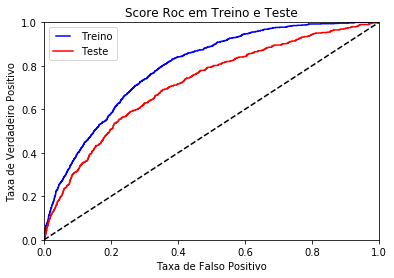

In [10]:
classifier = AdaBoostClassifier()
t0 = time()
classifier.fit(x_train, y_train)
print("Tempo de execução Adaboost:", round(time()-t0, 3), "s")
draw_roc_score(classifier, x_train, y_train, x_test, y_test)

### Gradient Boosting

Tempo de execução Gradient Boosting: 7.672 s
Train Accuracy: 0.9245%
Train Score Roc: 85.584%
Train CV Score : Mean - 0.7282286 | Std - 0.008040625 | Min - 0.7189369 | Max - 0.7417468
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9161666666666667%
Test Score Roc: 73.12%
Test CV Score : Mean - 0.7168484 | Std - 0.02632716 | Min - 0.6865867 | Max - 0.7532981


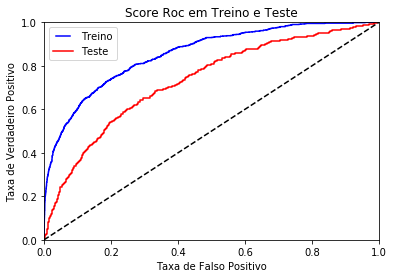

In [11]:
t0 = time()
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print("Tempo de execução Gradient Boosting:", round(time()-t0, 3), "s")
draw_roc_score(gb, x_train, y_train, x_test, y_test)

### Modelo Selecionado e Tuning

Como pudemos ver na seção anterior, o Gradient Boosting obteve o melhor desempenho utilizando uma instância padrão do classificador, ou seja, sem realizar qualquer ajuste nos seus hiperparâmetros. O proximo passo é identificar o melhor ajuste dos hiperparâmetros para o modelo selecionado, para isso, irei selecionar poucos hiperparâmetros a cada ajuste, afim de reduzir o tempo da busca e para tentar entender como está sendo a importância dada a cada feature. Nos passos a seguir, cada ajuste ideal encontrado será inserido como hiperparâmetro fixo na etapa seguinte.


Para iniciar, irei olhar a importância das features com o classificador padrão:

In [17]:
draw_feature_importance(gb.feature_importances_, x_train.columns)

### Passo 1

Encontrar o valor ideal para **n_estimators**

Tempo de execução: 19.434 s
Train Accuracy: 0.9237%
Train Score Roc: 90.833%
Train CV Score : Mean - 0.7184412 | Std - 0.01210847 | Min - 0.7064894 | Max - 0.7346434
------------------------------------------------------------------------------------------------
Test Accuracy: 0.919%
Test Score Roc: 71.975%
Test CV Score : Mean - 0.7060914 | Std - 0.03497484 | Min - 0.6561079 | Max - 0.7647783


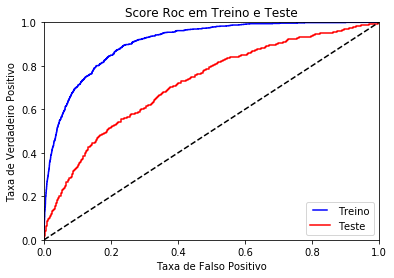

[mean: 0.68768, std: 0.00839, params: {'n_estimators': 10},
 mean: 0.70333, std: 0.01258, params: {'n_estimators': 20},
 mean: 0.70740, std: 0.01106, params: {'n_estimators': 30},
 mean: 0.71668, std: 0.01087, params: {'n_estimators': 40},
 mean: 0.71789, std: 0.01181, params: {'n_estimators': 50},
 mean: 0.71792, std: 0.01264, params: {'n_estimators': 60},
 mean: 0.71656, std: 0.01174, params: {'n_estimators': 70},
 mean: 0.71995, std: 0.01038, params: {'n_estimators': 80},
 mean: 0.72076, std: 0.01042, params: {'n_estimators': 90}]

{'n_estimators': 90}

0.7207633871486057

In [59]:
t0 = time()
param1 = {'n_estimators': np.arange(10, 100, 10)} 
grid1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                            min_samples_split=100,
                                                            min_samples_leaf=50,
                                                            max_depth=5,
                                                            max_features='sqrt',
                                                            subsample=0.8,
                                                            random_state=10), 
param_grid = param1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
grid1.fit(x_train, y_train)
print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid1, x_train, y_train, x_test, y_test)
display(grid1.grid_scores_, grid1.best_params_, grid1.best_score_)

Valor ideal para n_estimators é 90.

### Passo 2

Encontrar os valores ideais para **max_depth** e **min_samples_split**

Tempo de execução: 221.212 s
Train Accuracy: 0.9202%
Train Score Roc: 81.542%
Train CV Score : Mean - 0.7263148 | Std - 0.01228269 | Min - 0.7122108 | Max - 0.7467664
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9183333333333333%
Test Score Roc: 73.084%
Test CV Score : Mean - 0.7137096 | Std - 0.03478614 | Min - 0.6695605 | Max - 0.760093


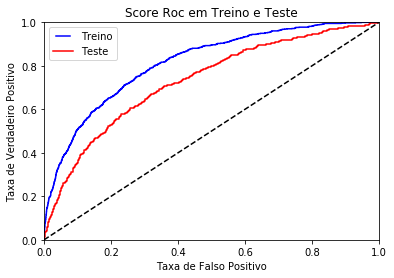

[mean: 0.72336, std: 0.01489, params: {'max_depth': 2, 'min_samples_split': 100},
 mean: 0.72146, std: 0.01557, params: {'max_depth': 2, 'min_samples_split': 200},
 mean: 0.72218, std: 0.01550, params: {'max_depth': 2, 'min_samples_split': 300},
 mean: 0.72122, std: 0.01625, params: {'max_depth': 2, 'min_samples_split': 400},
 mean: 0.72170, std: 0.01654, params: {'max_depth': 2, 'min_samples_split': 500},
 mean: 0.72162, std: 0.01654, params: {'max_depth': 2, 'min_samples_split': 600},
 mean: 0.72101, std: 0.01544, params: {'max_depth': 2, 'min_samples_split': 700},
 mean: 0.72004, std: 0.01535, params: {'max_depth': 2, 'min_samples_split': 800},
 mean: 0.72164, std: 0.01591, params: {'max_depth': 2, 'min_samples_split': 900},
 mean: 0.72056, std: 0.01455, params: {'max_depth': 2, 'min_samples_split': 1000},
 mean: 0.72139, std: 0.01503, params: {'max_depth': 2, 'min_samples_split': 1100},
 mean: 0.72014, std: 0.01399, params: {'max_depth': 2, 'min_samples_split': 1200},
 mean: 0.7269

{'max_depth': 3, 'min_samples_split': 900}

0.7300935717269401

In [14]:
t0 = time()
param2 = {'max_depth': np.arange(2, 10, 1), 'min_samples_split': np.arange(100, 1201, 100)} 
grid2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1,
                                                                n_estimators = 90,
                                                                max_features = 'sqrt',
                                                                subsample = 0.8,
                                                                random_state = 10), 
param_grid = param2, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid2.fit(x_train, y_train) 
print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid2, x_train, y_train, x_test, y_test)
display(grid2.grid_scores_, grid2.best_params_, grid2.best_score_)

Valores ideais para max_depth é 3 e min_samples_split é 900

### Passo 3

Encontrar o valor ideal para **min_samples_leaf**

Tempo de execução: 32.375 s
Train Accuracy: 0.9194%
Train Score Roc: 81.276%
Train CV Score : Mean - 0.7281602 | Std - 0.01097851 | Min - 0.7155317 | Max - 0.747107
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9178333333333333%
Test Score Roc: 73.032%
Test CV Score : Mean - 0.7089171 | Std - 0.02979526 | Min - 0.6691021 | Max - 0.7553891


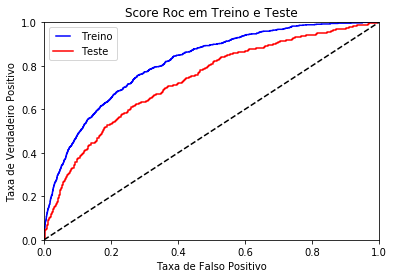

[mean: 0.72831, std: 0.00882, params: {'min_samples_leaf': 10},
 mean: 0.72870, std: 0.00944, params: {'min_samples_leaf': 15},
 mean: 0.72751, std: 0.01050, params: {'min_samples_leaf': 20},
 mean: 0.72735, std: 0.00974, params: {'min_samples_leaf': 25},
 mean: 0.72591, std: 0.00825, params: {'min_samples_leaf': 30},
 mean: 0.72957, std: 0.01081, params: {'min_samples_leaf': 35},
 mean: 0.72681, std: 0.01080, params: {'min_samples_leaf': 40},
 mean: 0.72928, std: 0.01053, params: {'min_samples_leaf': 45},
 mean: 0.72818, std: 0.01229, params: {'min_samples_leaf': 50},
 mean: 0.72750, std: 0.01381, params: {'min_samples_leaf': 55},
 mean: 0.72802, std: 0.01306, params: {'min_samples_leaf': 60},
 mean: 0.72842, std: 0.01288, params: {'min_samples_leaf': 65},
 mean: 0.72775, std: 0.01491, params: {'min_samples_leaf': 70},
 mean: 0.72829, std: 0.01260, params: {'min_samples_leaf': 75},
 mean: 0.72817, std: 0.01399, params: {'min_samples_leaf': 80},
 mean: 0.72839, std: 0.01357, params: {'

{'min_samples_leaf': 35}

0.7295729621436706

In [15]:
t0 = time()
param3 = {'min_samples_leaf': np.arange(10,101, 5)} 
grid3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1,
                                                                n_estimators = 90,
                                                                max_depth=3,
                                                                min_samples_split = 900,
                                                                max_features = 'sqrt',
                                                                subsample = 0.8,
                                                                random_state = 10), 
param_grid = param3, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid3.fit(x_train, y_train) 
print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid3, x_train, y_train, x_test, y_test)
display(grid3.grid_scores_, grid3.best_params_, grid3.best_score_)

O valor ideal para min_samples_leaf foi 35, mas como a pontuação reduziu, irei rodar outro teste com um número elevado de min_samples_split, só que agora verificando o valor ideal junto com min_samples_leaf.

### Passo 4

Encontrar os valores ideais para **min_samples_leaf** e **min_samples_split**

Tempo de execução: 171.18 s
Train Accuracy: 0.9194%
Train Score Roc: 80.58%
Train CV Score : Mean - 0.7257094 | Std - 0.01311425 | Min - 0.7125849 | Max - 0.7436972
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9185%
Test Score Roc: 73.421%
Test CV Score : Mean - 0.7177262 | Std - 0.02977896 | Min - 0.6792804 | Max - 0.7624634


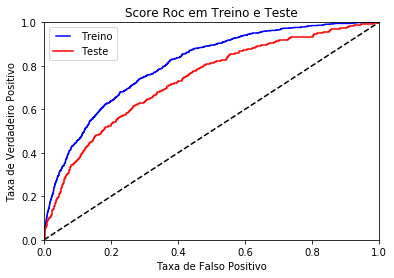

[mean: 0.72926, std: 0.01137, params: {'min_samples_leaf': 10, 'min_samples_split': 1000},
 mean: 0.72977, std: 0.01007, params: {'min_samples_leaf': 10, 'min_samples_split': 1100},
 mean: 0.72964, std: 0.01034, params: {'min_samples_leaf': 10, 'min_samples_split': 1200},
 mean: 0.72897, std: 0.01168, params: {'min_samples_leaf': 10, 'min_samples_split': 1300},
 mean: 0.72762, std: 0.01250, params: {'min_samples_leaf': 10, 'min_samples_split': 1400},
 mean: 0.72941, std: 0.01251, params: {'min_samples_leaf': 10, 'min_samples_split': 1500},
 mean: 0.73122, std: 0.01234, params: {'min_samples_leaf': 10, 'min_samples_split': 1600},
 mean: 0.73171, std: 0.01492, params: {'min_samples_leaf': 10, 'min_samples_split': 1700},
 mean: 0.73013, std: 0.01372, params: {'min_samples_leaf': 10, 'min_samples_split': 1800},
 mean: 0.72937, std: 0.01215, params: {'min_samples_leaf': 10, 'min_samples_split': 1900},
 mean: 0.72922, std: 0.01327, params: {'min_samples_leaf': 10, 'min_samples_split': 2000},

{'min_samples_leaf': 10, 'min_samples_split': 1700}

0.7317122629931205

In [6]:
t0 = time()
param4 = {'min_samples_leaf': np.arange(10,101, 10), 'min_samples_split': np.arange(1000, 2201, 100)} 
grid4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1,
                                                                n_estimators = 90,
                                                                max_depth=3,
                                                                max_features = 'sqrt',
                                                                subsample = 0.8,
                                                                random_state = 10), 
param_grid = param4, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid4.fit(x_train, y_train) 
print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid4, x_train, y_train, x_test, y_test)
display(grid4.grid_scores_, grid4.best_params_, grid4.best_score_)

O score voltou a subir e o valor ideal para min_samples_leaf ficou 10 e min_samples_split com 1700

### Passo 5

Encontrar o valor ideaL para **max_features**

Tempo de execução: 54.345 s
Train Accuracy: 0.9194%
Train Score Roc: 80.567%
Train CV Score : Mean - 0.7272665 | Std - 0.01277376 | Min - 0.7132762 | Max - 0.7492578
------------------------------------------------------------------------------------------------
Test Accuracy: 0.918%
Test Score Roc: 74.005%
Test CV Score : Mean - 0.7233044 | Std - 0.03284488 | Min - 0.6746029 | Max - 0.7600144


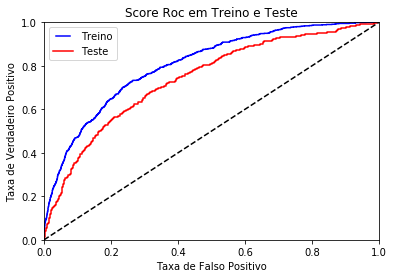

[mean: 0.67519, std: 0.00528, params: {'max_features': 1},
 mean: 0.68995, std: 0.00690, params: {'max_features': 2},
 mean: 0.69069, std: 0.00811, params: {'max_features': 3},
 mean: 0.70191, std: 0.01388, params: {'max_features': 4},
 mean: 0.70131, std: 0.01450, params: {'max_features': 5},
 mean: 0.70787, std: 0.00846, params: {'max_features': 6},
 mean: 0.71294, std: 0.01542, params: {'max_features': 7},
 mean: 0.71862, std: 0.01014, params: {'max_features': 8},
 mean: 0.71660, std: 0.01129, params: {'max_features': 9},
 mean: 0.72084, std: 0.01110, params: {'max_features': 10},
 mean: 0.71493, std: 0.01232, params: {'max_features': 11},
 mean: 0.71993, std: 0.01045, params: {'max_features': 12},
 mean: 0.72075, std: 0.00988, params: {'max_features': 13},
 mean: 0.71874, std: 0.01173, params: {'max_features': 14},
 mean: 0.72607, std: 0.01277, params: {'max_features': 15},
 mean: 0.73171, std: 0.01492, params: {'max_features': 16},
 mean: 0.72787, std: 0.01389, params: {'max_featu

{'max_features': 24}

0.7322463965050072

In [7]:
t0 = time()
param5 = {'max_features': np.arange(1, 30, 1)} 
grid5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1,
                                                                n_estimators = 90,
                                                                max_depth=3,
                                                                max_features = 'sqrt',
                                                                subsample = 0.8,
                                                                min_samples_leaf= 10,
                                                                min_samples_split = 1700,
                                                                random_state = 10), 
param_grid = param5, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid5.fit(x_train, y_train) 
print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid5, x_train, y_train, x_test, y_test)
display(grid5.grid_scores_, grid5.best_params_, grid5.best_score_)

O valor ideal para max_features é 24

### Passo 6

Encontrar o valor ideal para **learning_rate**

Tempo de execução: 13.232 s
Train Accuracy: 0.9197%
Train Score Roc: 80.105%
Train CV Score : Mean - 0.7298058 | Std - 0.01249685 | Min - 0.7179584 | Max - 0.7480388
------------------------------------------------------------------------------------------------
Test Accuracy: 0.9183333333333333%
Test Score Roc: 73.892%
Test CV Score : Mean - 0.7218239 | Std - 0.03328006 | Min - 0.6703837 | Max - 0.7578682


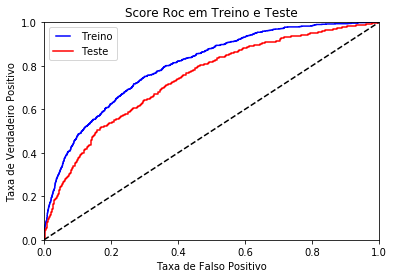

[mean: 0.65948, std: 0.01181, params: {'learning_rate': 1},
 mean: 0.70330, std: 0.01894, params: {'learning_rate': 0.5},
 mean: 0.71970, std: 0.01719, params: {'learning_rate': 0.25},
 mean: 0.72981, std: 0.01250, params: {'learning_rate': 0.1},
 mean: 0.72641, std: 0.01263, params: {'learning_rate': 0.05},
 mean: 0.70386, std: 0.01499, params: {'learning_rate': 0.01}]

{'learning_rate': 0.1}

0.7298057627523985

In [8]:
t0 = time()
param6 = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01]} 
grid6 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 90,
                                                            max_depth=3,
                                                            max_features = 24,
                                                            subsample = 0.8,
                                                            min_samples_leaf= 65,
                                                            min_samples_split = 1800,
                                                            random_state = 10), 
param_grid = param6, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid6.fit(x_train, y_train) 

print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid6, x_train, y_train, x_test, y_test)
display(grid6.grid_scores_, grid6.best_params_, grid6.best_score_)

O valor ideal para learning_rate é 0.1

### Passo 7

Encontrar o valor ideal para **subsample**

Tempo de execução: 15.368 s
Train Accuracy: 0.9196%
Train Score Roc: 80.705%
Train CV Score : Mean - 0.7284231 | Std - 0.0139116 | Min - 0.7119604 | Max - 0.7480388
------------------------------------------------------------------------------------------------
Test Accuracy: 0.918%
Test Score Roc: 73.712%
Test CV Score : Mean - 0.7195364 | Std - 0.02954495 | Min - 0.6735364 | Max - 0.7577225


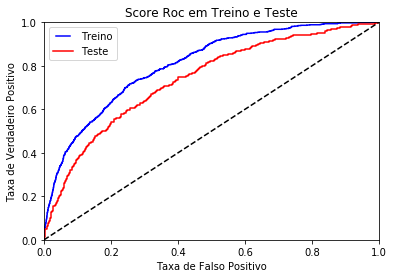

[mean: 0.50000, std: 0.00000, params: {'subsample': 0.1},
 mean: 0.50000, std: 0.00000, params: {'subsample': 0.2},
 mean: 0.72558, std: 0.01630, params: {'subsample': 0.30000000000000004},
 mean: 0.72811, std: 0.01605, params: {'subsample': 0.4},
 mean: 0.73050, std: 0.01713, params: {'subsample': 0.5},
 mean: 0.73042, std: 0.01220, params: {'subsample': 0.6},
 mean: 0.72915, std: 0.01467, params: {'subsample': 0.7000000000000001},
 mean: 0.72981, std: 0.01250, params: {'subsample': 0.8},
 mean: 0.73121, std: 0.01269, params: {'subsample': 0.9}]

{'subsample': 0.9}

0.7312113052217616

In [9]:
t0 = time()
param7 = {'subsample': np.arange(0.1, 1, 0.1)} 
grid7 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1,
                                                            n_estimators = 90,
                                                            max_depth=3,
                                                            max_features = 24,
                                                            subsample = 0.8,
                                                            min_samples_leaf= 65,
                                                            min_samples_split = 1800,
                                                            random_state = 10), 
param_grid = param7, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = 5) 
grid7.fit(x_train, y_train) 

print("Tempo de execução:", round(time()-t0, 3), "s")
draw_roc_score(grid7, x_train, y_train, x_test, y_test)
display(grid7.grid_scores_, grid7.best_params_, grid7.best_score_)

O valor ideal para subsample é 0.9.

### Visualizando Score Roc do estimador final

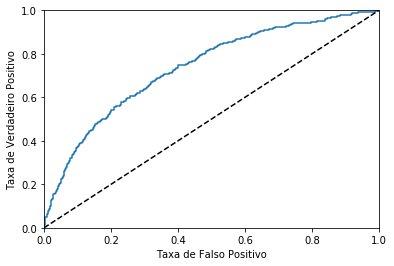

Score Roc: 74.0%


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_candidate1 = grid7.best_estimator_

y_probas = clf_candidate1.predict_proba(x_test)
y_scores = y_probas[:, 1] 

fpr1, tpr1, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr1, tpr1, linewidth=1.5, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.show()

print("Score Roc: {}%".format(np.round(roc_auc_score(y_test, y_scores)*100), 2))

## Análise Final do tunning

Como podemos perceber, encontrei o maior **Score Roc** nos dados de teste(74%) no passo 5 e no melhor estimador gerado no passo 7. 
Logo abaixo segue a configuração do estimador 5 e 7 nessa ordem:

In [20]:
clf_candidate2 = grid5.best_estimator_
display(clf_candidate1)
display(clf_candidate2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=24, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=65, min_samples_split=1800,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=10, subsample=0.9, verbose=0,
              warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=24, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=1700,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

O primeiro ponto a ser notado é as diferenças nos hiperparâmetros min_samples_leaf, min_samples_split e subsample, onde, para o min_samples_leaf e min_samples_split, o ideal é que se escolham os valores baixos para controlar o over-fitting, já para subsample, o ideal é que o valor seja menor que 1 com a finalidade de reduzir a variação. O segundo ponto é a diferença entre o score roc de treino e teste, onde a menor diferença representa que o modelo esteja generalizando para dados não vistos. Levando em consideração os pontos citados anteriormente, o modelo encontrado no **passo 5** representa os melhores ajustes, dessa forma irei ficar com ele.